**Data Preparation**

In [1]:
#Importing the required Libraries for matrix operation and list operation
import numpy as np
import pandas as pd
#Matplotlib for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the provided data in our local workspace
data = pd.read_csv(r"C:\Users\HAPPY\Desktop\Cristano_Ronaldo_Final_v1\data.csv")
submission = pd.read_csv(r"C:\Users\HAPPY\Desktop\Cristano_Ronaldo_Final_v1\sample_submission.csv")

In [3]:
#Overview of the data
data.head()

,Sno,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
submission.head()

,shot_id_number,is_goal
0,1,0.390247
1,8,0.549184
2,17,0.555152
3,20,0.675646
4,33,0.395124


In [5]:
#Setting the index name to Sno since it will come handy later
data.index.name = 'Sno'

In [6]:
data.columns

Index(['Sno', 'match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Sno                      30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [8]:
data['shot_id_number'] = data['Sno'] +1

Since the shot_id_number will be one of the primary key to match the submission dataset and data . We need to fill all the NULL values.

In [9]:
data.describe()

,Sno,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,30697.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15349.000000,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8861.604943,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7675.000000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15349.000000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23023.000000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


**FIlling the NULL values**

We can fill the columns date_of_game , knock_out_match , game_season and home/away by combining the rows with match_id and then fill it with the row having same match_id.

In [10]:
col = data[['match_id' ,'date_of_game' , 'knockout_match' , 'game_season' , 'home/away']]

In [11]:
col = col[data[['match_id' ,'date_of_game' , 'knockout_match' , 'game_season' , 'home/away']].notnull().all(1)]

In [12]:
col.drop_duplicates(subset = 'match_id' , keep = 'first',inplace = True)

In [13]:
col.head()

,match_id,date_of_game,knockout_match,game_season,home/away
Sno,,,,,
0,20000012,31-10-2000,0.0,2000-01,MANU @ POR
11,20000019,01-11-2000,0.0,2000-01,MANU vs. UTA
32,20000047,04-11-2000,0.0,2000-01,MANU @ VAN
52,20000049,05-11-2000,0.0,2000-01,MANU vs. LAC
66,20000058,07-11-2000,0.0,2000-01,MANU @ HOU


In [14]:
col.isnull().sum()

match_id          0
date_of_game      0
knockout_match    0
game_season       0
home/away         0
dtype: int64

In [15]:
for i in range (1,col.shape[0]):
    data.loc[data['match_id'] == col.iloc[i]['match_id'] ,'date_of_game' ] = col.iloc[i]['date_of_game']
    data.loc[data['match_id'] == col.iloc[i]['match_id'] ,'knockout_match' ] = col.iloc[i]['knockout_match']
    data.loc[data['match_id'] == col.iloc[i]['match_id'] ,'game_season' ] = col.iloc[i]['game_season']
    data.loc[data['match_id'] == col.iloc[i]['match_id'] ,'home/away' ] = col.iloc[i]['home/away']

Removing columns that were noise to our dataset.

In [16]:
data = data.iloc[:,0:22]

In [17]:
data['type_of_shot'].fillna('' , inplace = True)

In [18]:
data['type_of_combined_shot'].fillna('',inplace = True)

Combining the columns type_of_shot and type_of_combined_shot.

In [19]:
data['type_of_shot'] = data['type_of_shot'] + data['type_of_combined_shot']

In [20]:
data['type_of_shot'].isnull().sum()

0

Drop all the duplicate columns . 

In [21]:
data.drop(columns = ['Sno' , 'match_event_id' ,'game_season','team_name' ,'lat/lng','type_of_combined_shot'],axis = 1,inplace =True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 16 columns):
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       29135 non-null float64
power_of_shot       29211 non-null float64
knockout_match      30697 non-null float64
remaining_sec       29103 non-null float64
distance_of_shot    29130 non-null float64
is_goal             24429 non-null float64
area_of_shot        29195 non-null object
shot_basics         29122 non-null object
range_of_shot       29133 non-null object
date_of_game        30695 non-null object
home/away           30693 non-null object
shot_id_number      30697 non-null int64
type_of_shot        30697 non-null object
match_id            30697 non-null int64
dtypes: float64(8), int64(2), object(6)
memory usage: 3.7+ MB


Visualising all the columns having object type and filling the NULL Values respectively.

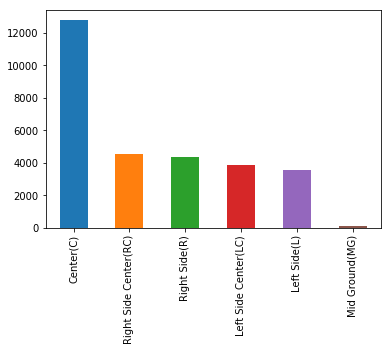

In [23]:
data['area_of_shot'].value_counts().plot.bar()

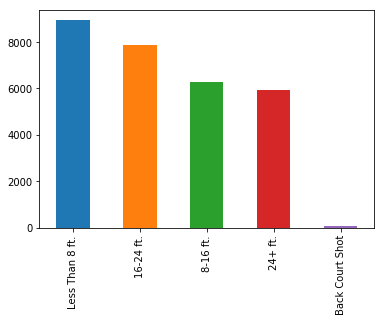

In [24]:
data['range_of_shot'].value_counts().plot.bar()

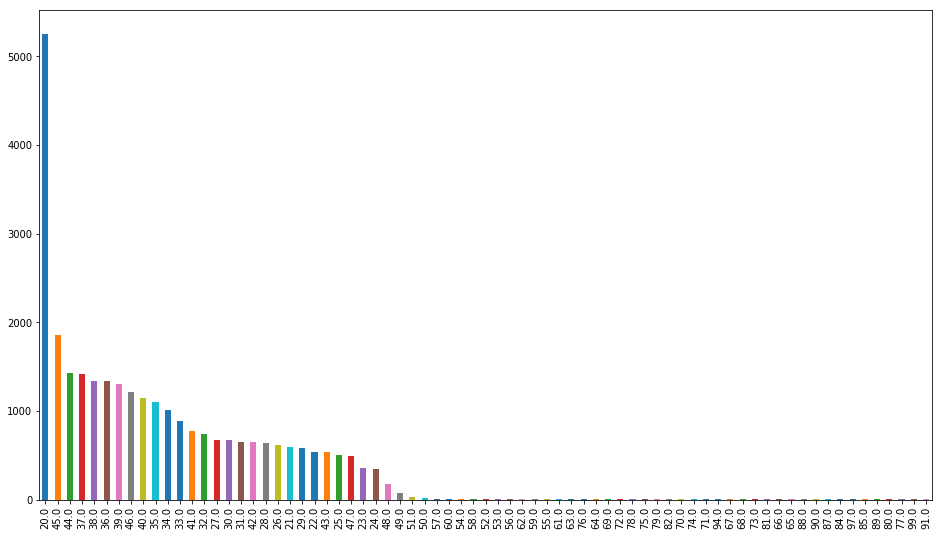

In [25]:
data['distance_of_shot'].value_counts().plot.bar(figsize= (16,9))

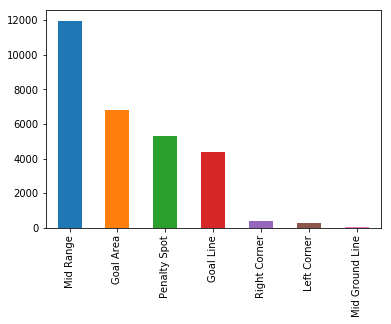

In [26]:
data['shot_basics'].value_counts().plot.bar()

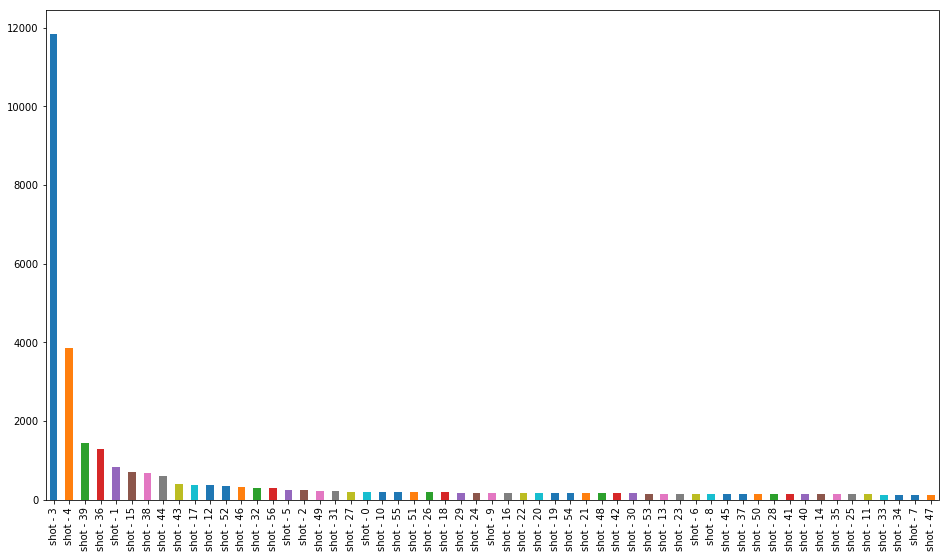

In [27]:
data['type_of_shot'].value_counts().plot.bar(figsize = (16,9))

In [28]:
data['away/home'] = 0
data['home/away'] = data['home/away'].astype(str)

Here we encoded the home/away column depending upon whether it contains '@' or not.

In [29]:
data['away/home'] = data['home/away'].str.find('@')

In [30]:
data.loc[data['away/home']>=0,'away/home'] = 1
data.loc[data['away/home']<0,'away/home'] = 0

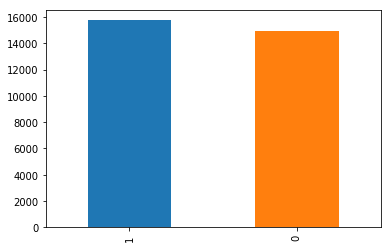

In [31]:
data['away/home'].value_counts().plot.bar()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 17 columns):
location_x          29236 non-null float64
location_y          29157 non-null float64
remaining_min       29135 non-null float64
power_of_shot       29211 non-null float64
knockout_match      30697 non-null float64
remaining_sec       29103 non-null float64
distance_of_shot    29130 non-null float64
is_goal             24429 non-null float64
area_of_shot        29195 non-null object
shot_basics         29122 non-null object
range_of_shot       29133 non-null object
date_of_game        30695 non-null object
home/away           30697 non-null object
shot_id_number      30697 non-null int64
type_of_shot        30697 non-null object
match_id            30697 non-null int64
away/home           30697 non-null int64
dtypes: float64(8), int64(3), object(6)
memory usage: 4.0+ MB


Add more features to our dataset.

In [33]:
data['date_of_game'] = pd.to_datetime(data['date_of_game'])

In [34]:
data['Month'] = data['date_of_game'].dt.month
data['Year']  =data['date_of_game'].dt.year
data['Day']  = data['date_of_game'].dt.day

In [35]:
data['shot_basics'].isnull().sum()

1575

In [36]:
data['range_of_shot'].isnull().sum()

1564

In [37]:
data.loc[data['shot_basics']=='Mid Range','range_of_shot'] = "16-24 ft."
data.loc[data['shot_basics']=='Penalty Spot','range_of_shot'] = "24+ ft."
data.loc[data['shot_basics']=='Goal Area','range_of_shot'] = "Less Than 8 ft."
data.loc[data['shot_basics']=='Goal Line','range_of_shot'] = "8-16 ft."

In [38]:
data['range_of_shot'].isnull().sum()

103

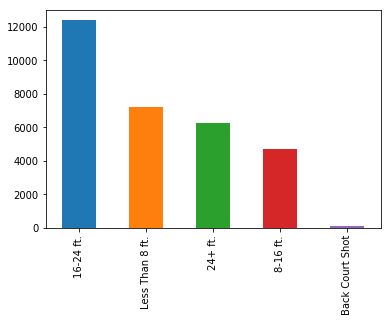

In [39]:
data['range_of_shot'].value_counts().plot.bar()

In [40]:
data['area_of_shot'].fillna('Center(C)' , inplace = True)
data['range_of_shot'].fillna('16-24 ft.',inplace =True)
data['type_of_shot'].fillna('shot - 3',inplace =True)
data['shot_basics'].fillna('Mid Range',inplace =True)

In [41]:
data.isnull().sum()

location_x          1461
location_y          1540
remaining_min       1562
power_of_shot       1486
knockout_match         0
remaining_sec       1594
distance_of_shot    1567
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           2
home/away              0
shot_id_number         0
type_of_shot           0
match_id               0
away/home              0
Month                  2
Year                   2
Day                    2
dtype: int64

In [42]:
data['location_x'].fillna((data['location_x'].mean()), inplace=True)
data['location_y'].fillna((data['location_y'].mean()), inplace=True)
data['remaining_min'].fillna((data['remaining_min'].mean()), inplace=True)
data['power_of_shot'].fillna((data['power_of_shot'].mean()), inplace=True)
data['remaining_sec'].fillna((data['remaining_sec'].mean()), inplace=True)
data['distance_of_shot'].fillna((data['distance_of_shot'].mean()), inplace=True)

In [43]:
data.isnull().sum()

location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           2
home/away              0
shot_id_number         0
type_of_shot           0
match_id               0
away/home              0
Month                  2
Year                   2
Day                    2
dtype: int64

In [44]:
data[data['Month'].isnull()]

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,type_of_shot,match_id,away/home,Month,Year,Day
Sno,,,,,,,,,,,,,,,,,,,,
6909,-176.0,189.0,11.0,1.0,0.0,40.0,45.0,NaN,Left Side Center(LC),Penalty Spot,24+ ft.,NaT,MANU vs. CLE,6910,shot - 3,20400518,0,NaN,NaN,NaN
22902,-131.0,97.0,10.0,2.0,0.0,8.0,36.0,0.0,Left Side Center(LC),Mid Range,16-24 ft.,NaT,MANU @ NYK,22903,shot - 9,29600031,1,NaN,NaN,NaN


In [45]:
data.loc[data['match_id']==20400518,'Year'] = 2005
data.loc[data['match_id']==20400518,'Month'] = 1
data.loc[data['match_id']==20400518,'Day'] = 13

In [46]:
data.isnull().sum()

location_x             0
location_y             0
remaining_min          0
power_of_shot          0
knockout_match         0
remaining_sec          0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           2
home/away              0
shot_id_number         0
type_of_shot           0
match_id               0
away/home              0
Month                  1
Year                   1
Day                    1
dtype: int64

In [47]:
data.drop(columns = ['date_of_game' ,'home/away'],axis = 1,inplace =True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
location_x          30697 non-null float64
location_y          30697 non-null float64
remaining_min       30697 non-null float64
power_of_shot       30697 non-null float64
knockout_match      30697 non-null float64
remaining_sec       30697 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null object
shot_basics         30697 non-null object
range_of_shot       30697 non-null object
shot_id_number      30697 non-null int64
type_of_shot        30697 non-null object
match_id            30697 non-null int64
away/home           30697 non-null int64
Month               30696 non-null float64
Year                30696 non-null float64
Day                 30696 non-null float64
dtypes: float64(11), int64(3), object(4)
memory usage: 4.2+ MB


In [49]:
data['area_of_shot'].replace(['Center(C)' ,'Right Side Center(RC)','Right Side(R)','Left Side Center(LC)','Left Side(L)','Mid Ground(MG)'],[0,1,2,3,4,5],inplace =True)


In [50]:
data['shot_basics'].replace(['Mid Range' ,'Goal Area','Penalty Spot','Goal Line','Right Corner','Left Corner','Mid Ground Line'],[0,1,2,3,4,5,6],inplace =True)


In [51]:
data['range_of_shot'].replace(['16-24 ft.' ,'Less Than 8 ft.','24+ ft.','8-16 ft.','Back Court Shot'],[0,1,2,3,4],inplace =True)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
location_x          30697 non-null float64
location_y          30697 non-null float64
remaining_min       30697 non-null float64
power_of_shot       30697 non-null float64
knockout_match      30697 non-null float64
remaining_sec       30697 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null int64
shot_basics         30697 non-null int64
range_of_shot       30697 non-null int64
shot_id_number      30697 non-null int64
type_of_shot        30697 non-null object
match_id            30697 non-null int64
away/home           30697 non-null int64
Month               30696 non-null float64
Year                30696 non-null float64
Day                 30696 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 4.2+ MB


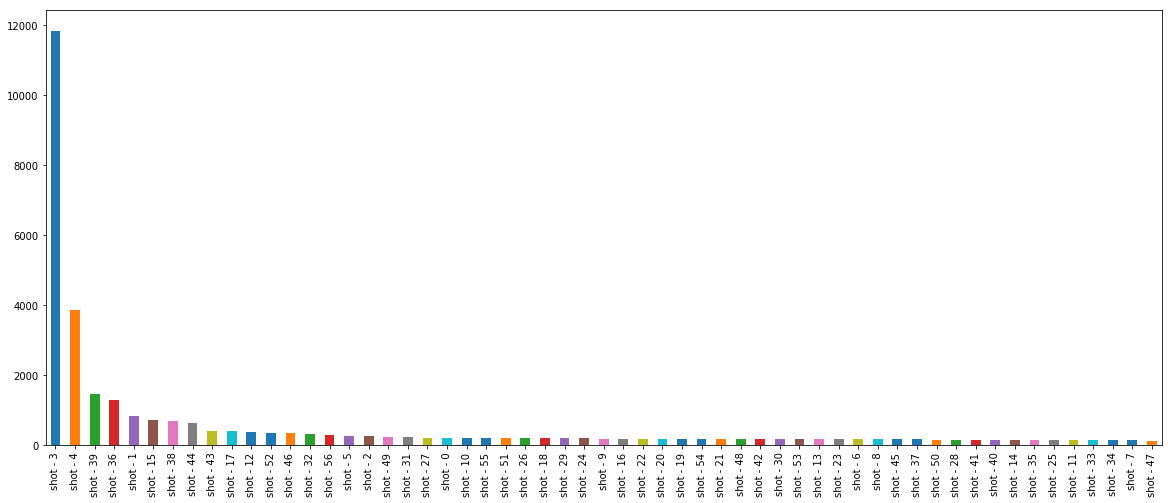

In [53]:
data['type_of_shot'].value_counts().plot.bar(figsize = (20,8))

In [54]:
data['type_of_shot'].replace(['shot - 0' ,'shot - 1' ,'shot - 2' ,'shot - 3' ,'shot - 4' ,'shot - 5' ,'shot - 6' ,'shot - 7' ,'shot - 8' ,'shot - 9' ,'shot - 10' ,'shot - 11' ,'shot - 12' ,'shot - 13' ,'shot - 14' ,'shot - 15' ,'shot - 16' ,'shot - 17' ,'shot - 18' ,'shot - 19' ,'shot - 20' ,'shot - 21' ,'shot - 22' ,'shot - 23' ,'shot - 24' ,'shot - 25' ,'shot - 26' ,'shot - 27' ,'shot - 28' ,'shot - 29' ,'shot - 30' ,'shot - 31' ,'shot - 32' ,'shot - 33' ,'shot - 34' ,'shot - 35' ,'shot - 36' ,'shot - 37' ,'shot - 38' ,'shot - 39' ,'shot - 40' ,'shot - 41' ,'shot - 42' ,'shot - 43' ,'shot - 44' ,'shot - 45' ,'shot - 46' ,'shot - 47' ,'shot - 48' ,'shot - 49' ,'shot - 50' ,'shot - 51' ,'shot - 52' ,'shot - 53' ,'shot - 54' ,'shot - 55' ,'shot - 56' ],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56],inplace =True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
location_x          30697 non-null float64
location_y          30697 non-null float64
remaining_min       30697 non-null float64
power_of_shot       30697 non-null float64
knockout_match      30697 non-null float64
remaining_sec       30697 non-null float64
distance_of_shot    30697 non-null float64
is_goal             24429 non-null float64
area_of_shot        30697 non-null int64
shot_basics         30697 non-null int64
range_of_shot       30697 non-null int64
shot_id_number      30697 non-null int64
type_of_shot        30697 non-null int64
match_id            30697 non-null int64
away/home           30697 non-null int64
Month               30696 non-null float64
Year                30696 non-null float64
Day                 30696 non-null float64
dtypes: float64(11), int64(7)
memory usage: 4.2 MB


**Separating the training and test data**

In [56]:
a = set(submission["shot_id_number"])
a = list(a)

In [57]:
len(a)
test = data.loc[data['shot_id_number'].isin(a)]

In [58]:
test.shape

(5000, 18)

In [59]:
train = data[data['is_goal'].notnull()]

In [60]:
train.shape
train = train.dropna()

In [61]:
y_train = train['is_goal']

In [62]:
train.drop(columns = ['match_id' , 'shot_id_number','remaining_min','remaining_sec'],axis = 1,inplace = True)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24428 entries, 1 to 30696
Data columns (total 14 columns):
location_x          24428 non-null float64
location_y          24428 non-null float64
power_of_shot       24428 non-null float64
knockout_match      24428 non-null float64
distance_of_shot    24428 non-null float64
is_goal             24428 non-null float64
area_of_shot        24428 non-null int64
shot_basics         24428 non-null int64
range_of_shot       24428 non-null int64
type_of_shot        24428 non-null int64
away/home           24428 non-null int64
Month               24428 non-null float64
Year                24428 non-null float64
Day                 24428 non-null float64
dtypes: float64(9), int64(5)
memory usage: 2.8 MB


In [64]:
test.drop(columns = ['is_goal' , 'match_id' , 'shot_id_number','remaining_min','remaining_sec'],axis = 1,inplace = True)

c:\users\happy\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
test.shape

(5000, 13)

In [66]:
train_df = train

In [67]:
target = 'is_goal'
predictors = test.columns.values.tolist()

In [68]:
train_df['is_goal'].value_counts()

0.0    13549
1.0    10879
Name: is_goal, dtype: int64

**MODEL**

Here I have used Light Gradient Boost Model which is one of the tree based model.
I have used Bayesian Optimization to find the respective optimal parameters.

In [69]:
from sklearn.model_selection import StratifiedKFold
bayesian_tr_index, bayesian_val_index  = list(StratifiedKFold(n_splits=2, shuffle=True, random_state=1).split(train_df, train_df['is_goal'].values))[0]

**Bayesian Optimization Technique**

 Black box function to be optimized (LightGBM)

In [70]:
from sklearn import metrics
def LGB_bayesian(
    num_leaves,  # int
    min_data_in_leaf,  # int
    learning_rate,
    min_sum_hessian_in_leaf,    # int  
    feature_fraction,
    lambda_l1,
    lambda_l2,
    min_gain_to_split,
    max_depth):
    
    # LightGBM expects next three parameters need to be integer. So we make them integer
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int

    param = {
        'num_leaves': num_leaves,
        'min_data_in_leaf': min_data_in_leaf,
        'learning_rate': learning_rate,
        'min_sum_hessian_in_leaf': min_sum_hessian_in_leaf,
        'bagging_fraction' : 1,
        'feature_fraction': feature_fraction,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'min_gain_to_split': min_gain_to_split,
        'max_depth': max_depth,
        'save_binary': True, 
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'mae',
        'is_unbalance': True,
        'boost_from_average': True,   

    }    
    
    
    xg_train = lgb.Dataset(train_df.iloc[bayesian_tr_index][predictors].values,
                           label=train_df.iloc[bayesian_tr_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )
    xg_valid = lgb.Dataset(train_df.iloc[bayesian_val_index][predictors].values,
                           label=train_df.iloc[bayesian_val_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )   

    num_round = 5000
    clf = lgb.train(param, xg_train, num_round, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    
    predictions = clf.predict(train_df.iloc[bayesian_val_index][predictors].values, num_iteration=clf.best_iteration)   
    
    score = metrics.roc_auc_score(train_df.iloc[bayesian_val_index][target].values, predictions)
    
    return score

Now I need to give bounds for these parameters, so that Bayesian optimization only search inside the bounds.

In [71]:
bounds_LGB = {
    'num_leaves': (5, 30), 
    'min_data_in_leaf': (5, 30),  
    'learning_rate': (0.01, 0.3),
    'min_sum_hessian_in_leaf': (0.00001, 0.01),    
    'feature_fraction': (0.05, 0.5),
    'lambda_l1': (0, 5.0), 
    'lambda_l2': (0, 5.0), 
    'min_gain_to_split': (0, 1.0),
    'max_depth':(3,20),
}

Let's put all of them in BayesianOptimization object

In [72]:
from bayes_opt import BayesianOptimization

In [73]:
LGB_BO = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=0)

In [74]:
print(LGB_BO.space.keys)

['feature_fraction', 'lambda_l1', 'lambda_l2', 'learning_rate', 'max_depth', 'min_data_in_leaf', 'min_gain_to_split', 'min_sum_hessian_in_leaf', 'num_leaves']


In [75]:
init_points = 5
n_iter = 5

In [76]:
import warnings
import lightgbm as lgb
print('-' * 130)

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[83]	valid_0's l1: 0.462094
|  1        |  0.641    |  0.297    |  3.576    |  3.014    |  0.168    |  10.2     |  21.15    |  0.4376   |  0.008919 |  29.09    |
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[167]	valid_0's l1: 0.459343
|  2        |  0.6403   |  0.2225   |  3.959    |  2.644    |  0.1747   |  18.74    |  6.776    |  0.08713  |  0.000212 |  25.82    |
Training until validation scores don't improve for 50 rounds.
Early stopping, best

In [77]:
LGB_BO.max['target']

0.6450038121337096

In [78]:
LGB_BO.probe(
    params={'feature_fraction': 0.1403, 
            'lambda_l1': 4.218, 
            'lambda_l2': 1.734, 
            'learning_rate': 0.07, 
            'max_depth': 14, 
            'min_data_in_leaf': 17, 
            'min_gain_to_split': 0.1501, 
            'min_sum_hessian_in_leaf': 0.000446, 
            'num_leaves': 6},
    lazy=True, # 
)

In [79]:
LGB_BO.maximize(init_points=0, n_iter=0)

|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds.
[250]	valid_0's l1: 0.470586
[500]	valid_0's l1: 0.467476
[750]	valid_0's l1: 0.465873
[1000]	valid_0's l1: 0.464908
[1250]	valid_0's l1: 0.464218
Early stopping, best iteration is:
[1220]	valid_0's l1: 0.46421
|  11       |  0.6399   |  0.1403   |  4.218    |  1.734    |  0.07     |  14.0     |  17.0     |  0.1501   |  0.000446 |  6.0      |


In [80]:
for i, res in enumerate(LGB_BO.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': 0.6410088588018232, 'params': {'feature_fraction': 0.29696607676729614, 'lambda_l1': 3.5759468318620975, 'lambda_l2': 3.0138168803582195, 'learning_rate': 0.16801612306910008, 'max_depth': 10.202131588761379, 'min_data_in_leaf': 21.147352826666403, 'min_gain_to_split': 0.4375872112626925, 'min_sum_hessian_in_leaf': 0.008918812277812977, 'num_leaves': 29.09156901252573}}
Iteration 1: 
	{'target': 0.64025101747341, 'params': {'feature_fraction': 0.22254868347159995, 'lambda_l1': 3.958625190413323, 'lambda_l2': 2.644474598764522, 'learning_rate': 0.17473292271724036, 'max_depth': 18.735142850975237, 'min_data_in_leaf': 6.775901454947173, 'min_gain_to_split': 0.08712929970154071, 'min_sum_hessian_in_leaf': 0.00021198179042885394, 'num_leaves': 25.81549613869845}}
Iteration 2: 
	{'target': 0.6409778190796613, 'params': {'feature_fraction': 0.40017053792743273, 'lambda_l1': 4.3500607412340955, 'lambda_l2': 4.89309171116382, 'learning_rate': 0.24175598362284983, 'max

In [81]:
LGB_BO.max['target']

0.6450038121337096

In [82]:
LGB_BO.max['params']

{'feature_fraction': 0.47510101267231275,
 'lambda_l1': 2.6092416087503585,
 'lambda_l2': 2.0733096999526177,
 'learning_rate': 0.0867211275103418,
 'max_depth': 16.161972720381684,
 'min_data_in_leaf': 16.403758305413714,
 'min_gain_to_split': 0.5684339488686485,
 'min_sum_hessian_in_leaf': 0.00019771010635918787,
 'num_leaves': 20.44088742689693}

**FINAL MODEL WITH PARAMETERS**

In [83]:
param_lgb = {
        'num_leaves': int(LGB_BO.max['params']['num_leaves']), # remember to int here
        'min_data_in_leaf': int(LGB_BO.max['params']['min_data_in_leaf']), # remember to int here
        'learning_rate': LGB_BO.max['params']['learning_rate'],
        'min_sum_hessian_in_leaf': LGB_BO.max['params']['min_sum_hessian_in_leaf'],
        'bagging_fraction': 1.0, 
        'feature_fraction': LGB_BO.max['params']['feature_fraction'],
        'lambda_l1': LGB_BO.max['params']['lambda_l1'],
        'lambda_l2': LGB_BO.max['params']['lambda_l2'],
        'min_gain_to_split': LGB_BO.max['params']['min_gain_to_split'],
        'max_depth': int(LGB_BO.max['params']['max_depth']), # remember to int here
        'save_binary': True,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'mae',
        'is_unbalance': True,
        'boost_from_average': True,
    }

In [84]:
nfold = 5

In [85]:
import gc
gc.collect()

231

In [86]:
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=2019)

In [87]:
oof = np.zeros(len(train_df))
predictions = np.zeros((len(test),nfold))

In [88]:
i = 1
for train_index, valid_index in skf.split(train_df, train_df.is_goal.values):
    print("\nfold {}".format(i))
    xg_train = lgb.Dataset(train_df.iloc[train_index][predictors].values,
                           label=train_df.iloc[train_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )
    xg_valid = lgb.Dataset(train_df.iloc[valid_index][predictors].values,
                           label=train_df.iloc[valid_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )   

    
    clf = lgb.train(param_lgb, xg_train, 5000, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    oof[valid_index] = clf.predict(train_df.iloc[valid_index][predictors].values, num_iteration=clf.best_iteration) 
    
    predictions[:,i-1] += clf.predict(test[predictors], num_iteration=clf.best_iteration)
    i = i + 1

print("\n\nCV AUC: {:<0.2f}".format(metrics.roc_auc_score(train_df.is_goal.values, oof)))


fold 1
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[86]	valid_0's l1: 0.460268

fold 2
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[96]	valid_0's l1: 0.461407

fold 3
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[89]	valid_0's l1: 0.45921

fold 4
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[98]	valid_0's l1: 0.460155

fold 5
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[90]	valid_0's l1: 0.461139


CV AUC: 0.65


In [89]:
predictions

array([[0.38666476, 0.36811956, 0.36813918, 0.32925213, 0.39172821],
       [0.51829351, 0.53242939, 0.52897851, 0.5658103 , 0.61198999],
       [0.69377512, 0.69014445, 0.69804856, 0.68649546, 0.70197601],
       ...,
       [0.66757309, 0.67342603, 0.69080125, 0.67655598, 0.66546996],
       [0.74626097, 0.72609253, 0.75190906, 0.76112773, 0.75410171],
       [0.59677058, 0.49146025, 0.58982563, 0.58419719, 0.508237  ]])

In [90]:
submission['is_goal'] = predictions

In [91]:
submission['is_goal'].describe()

count    5000.000000
mean        0.498711
std         0.135392
min         0.049694
25%         0.413978
50%         0.464472
75%         0.552416
max         0.930623
Name: is_goal, dtype: float64

In [93]:
submission.to_csv('dalip_patra_08081998_prediction_15.csv')